In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import math
# import multiprocessing as mp
from  multiprocessing import Pool

In [ ]:
# #traces
traces_raw = np.load('data/traces_attack_hw3/traces_attack_int16.npy')
# #plaintext
plain_text = np.load('data/traces_attack_hw3/textin_attack.npy')
traces = traces_raw[:,:7000]

In [2]:
# #traces
traces_raw = np.load('C:/Users/coe_user/Desktop/PhyAttcks/hw3/data/traces_attack_hw3/traces_attack_int16.npy')
# #plaintext
plain_text = np.load('C:/Users/coe_user/Desktop/PhyAttcks/hw3/data/traces_attack_hw3/textin_attack.npy')
traces = traces_raw[:,:7000]

In [3]:
sbox = np.array([
0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16
])

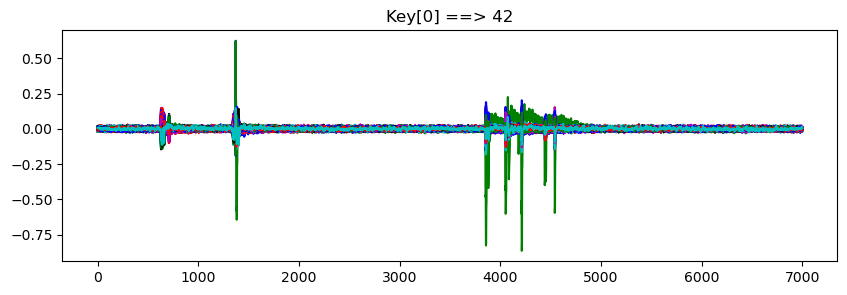

key 0 value 42


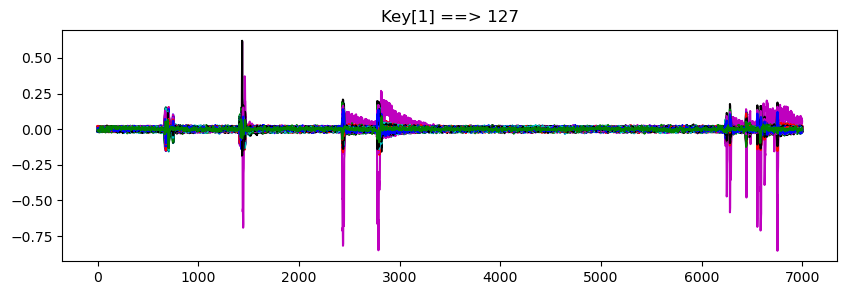

key 1 value 127


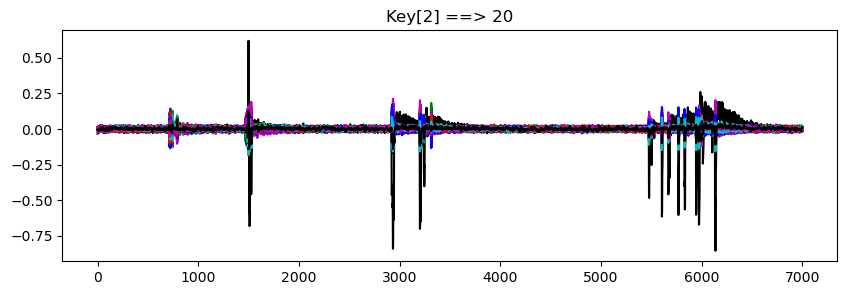

key 2 value 20


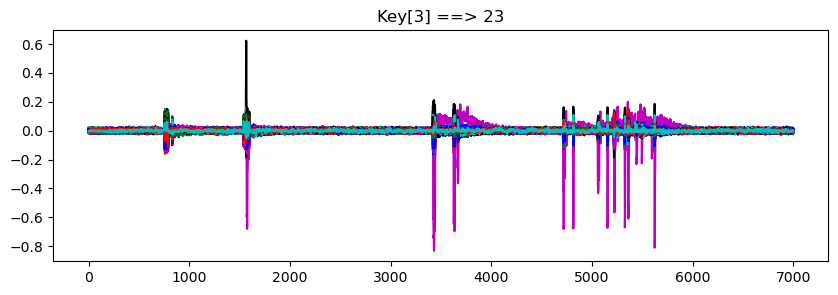

key 3 value 23


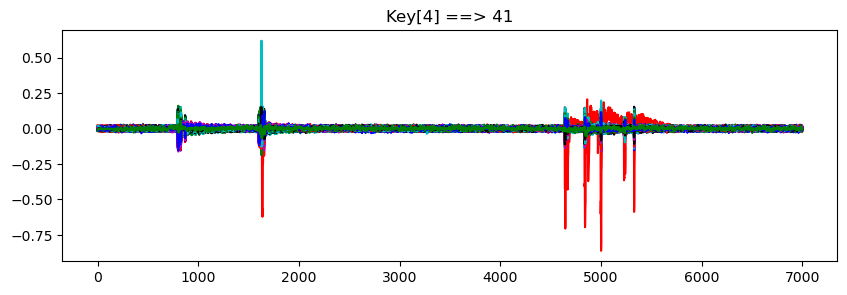

key 4 value 41


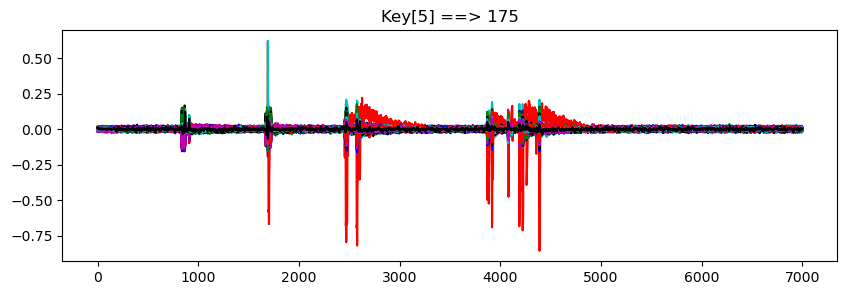

key 5 value 175


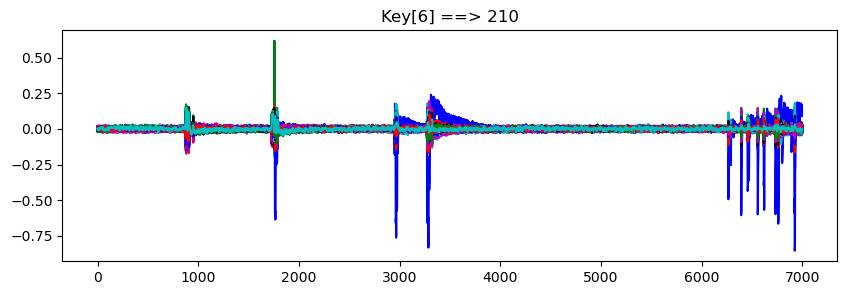

key 6 value 210


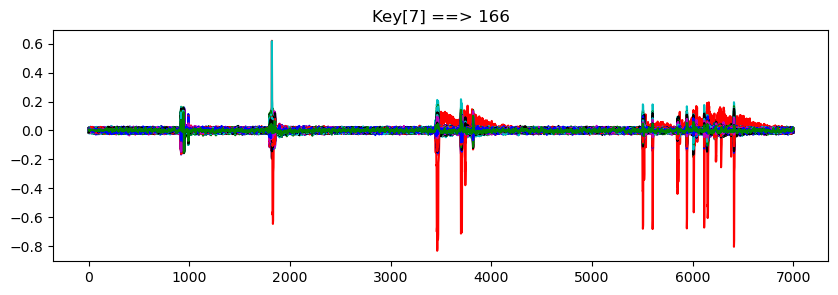

key 7 value 166


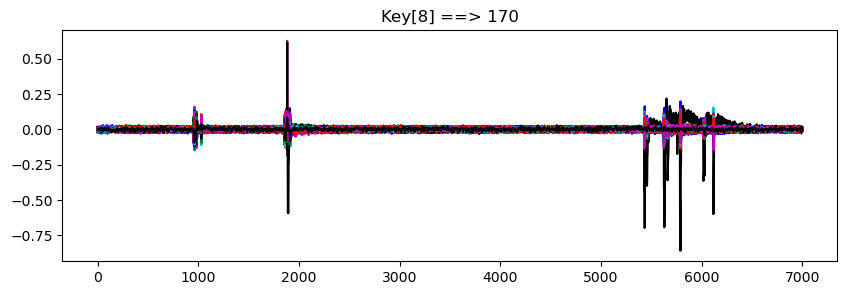

key 8 value 170


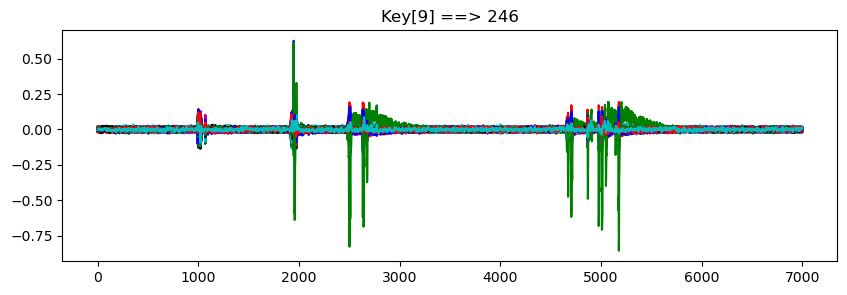

key 9 value 246


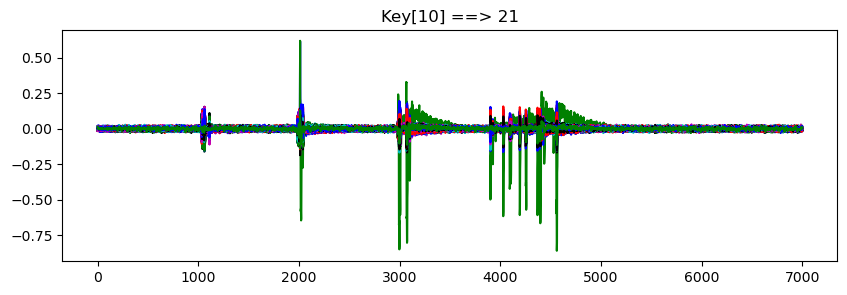

key 10 value 21


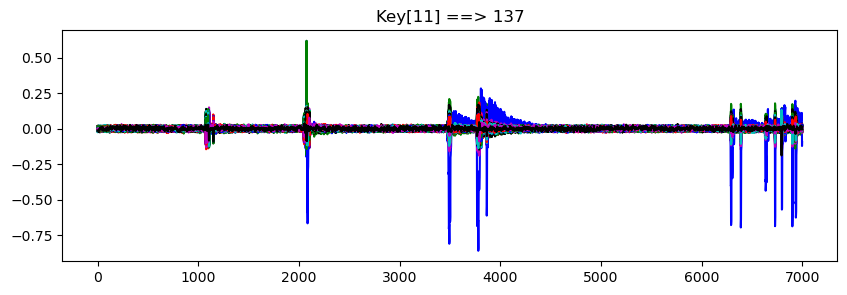

key 11 value 137


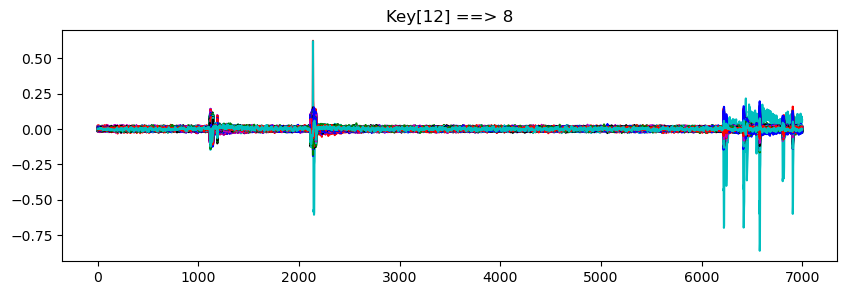

key 12 value 8


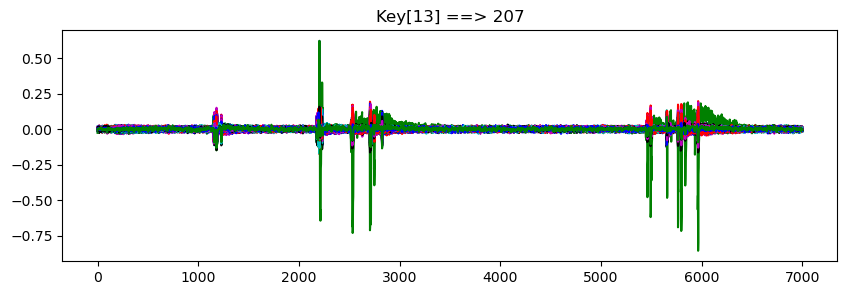

key 13 value 207


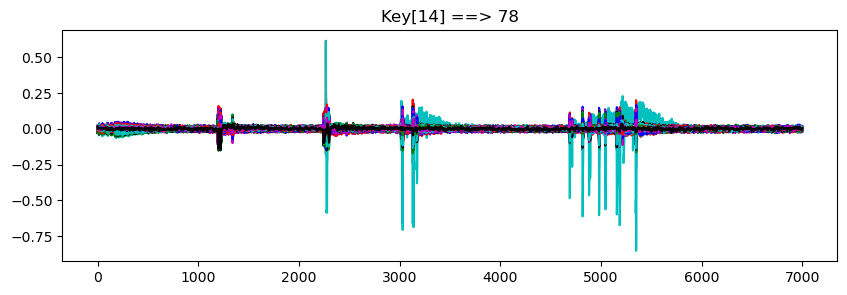

key 14 value 78


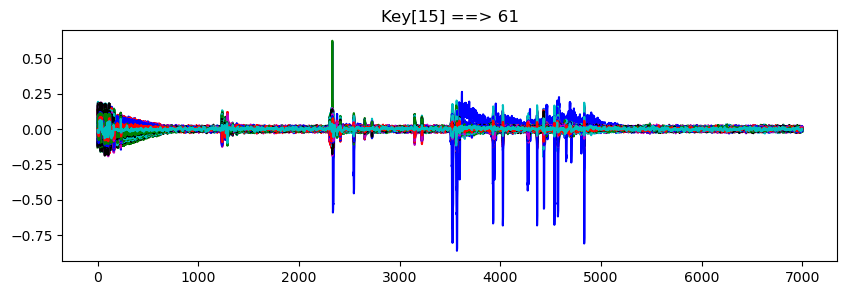

key 15 value 61
Total Time 129.23694396018982


In [6]:
##### CPA with SBOX lookup and Hamming Weight
## CPA for SubBytes

from itertools import cycle
color = cycle('bgrcmk')

def find_key(byte):
    #key hypothesis vector 
    key_hypothesis = np.tile(np.arange(256), (20000, 1))
    #calculate traces mean along the columns
    traces_mean = np.mean(traces, axis = 0)

    d_vector = np.tile(plain_text[:,i],(256,1))
    d_vector = d_vector.T #tranposing the datavector 
 
    intermediate_value = np.array(
            sbox[np.bitwise_xor(d_vector, key_hypothesis)]  
            # np.bitwise_xor(d_vector, key_hypothesis)
        ) #sbox look up
    
    # print(intermediate_value.shape)
    def count_ones(n):
            return (np.binary_repr(n)).count('1')
    # numpy.vectorize() to apply the function to each element in the array
    count_ones_vec = np.vectorize(count_ones)
    # Applying the function to each element in the intermediate_values
    hamming_values = count_ones_vec(intermediate_value)
   
    hv_mean = np.mean(hamming_values, axis = 0)#hamming_values means
    #calculate the hammings
    h_vector = hamming_values - hv_mean#calulate the ham distance of HV
    t_vector = traces - traces_mean #calulate the ham distance of traces
    
    numerator = np.matmul(h_vector.T, t_vector) #calculating numerator

    h_vector_sq = np.sum(np.square(h_vector),axis = 0)#finding the square of h_vector
    t_vector_sq = np.sum(np.square(t_vector),axis = 0) #finding the square of t_vector

    
    denominator = np.sqrt(np.multiply.outer(h_vector_sq, t_vector_sq))#denominator calculation
    denominator[denominator == 0] = np.inf
    # np.where(denominator ==0 , np.inf, denominator)

    # r = np.where(denominator!=0,np.divide(numerator, denominator),numerator)#r matrix

    r = np.divide(numerator, denominator)
 
    #plot graph
    _, ax = plt.subplots(figsize=(10, 3))
    x = np.array(range(7000))
    plt.title(f"Key[{byte}] ==> {np.argmax(r)//7000}")
    for key_guess in r:
        ax.plot(x,key_guess, c=next(color))
    plt.show()
    key = np.argmax(r)//7000
    print("key",byte,"value",key)
    return numerator, denominator


# pooling multithreads 
# all_start = time()
# with Pool(16) as p:
#   p.map(find_key, range(16)) #pool processes for 16 bytes  
#   #Total execution time
#   print("Total Time", time()- all_start)

# #to run with single thread to get keys
all_start = time()
for i in range(16):
    numerator, denominator = find_key(i)
print("Total Time", time()- all_start)

In [5]:
##### CPA without SBOX lookup and Hamming distance 
## CPA for AddKey

from itertools import cycle
color = cycle('bgrcmk')

def find_key(byte):
    #key hypothesis vector 
    key_hypothesis = np.tile(np.arange(256), (20000, 1))
    #calculate traces mean along the columns
    traces_mean = np.mean(traces, axis = 0)

    d_vector = np.tile(plain_text[:,i],(256,1))
    d_vector = d_vector.T #tranposing the datavector 
 
    def hamming_distance(s1, s2):#calucate the hamming distance 
        return sum(c1 != c2 for c1, c2 in zip(np.binary_repr(s1),np.binary_repr(s2)))
            # return (np.binary_repr(n)).count('1')
    # numpy.vectorize() to apply the function to each element in the array
    count_ones_vec = np.vectorize(hamming_distance)
    # Applying the function to each element in the intermediate_values
    hamming_values = count_ones_vec(d_vector, key_hypothesis)
    # print(hamming_values)
    hv_mean = np.mean(hamming_values, axis = 0)#hamming_values means
    #calculate the hammings
    h_vector = hamming_values - hv_mean#calulate the ham distance of HV
    t_vector = traces - traces_mean #calulate the ham distance of traces
    
    numerator = np.matmul(h_vector.T, t_vector) #calculating numerator

    h_vector_sq = np.sum(np.square(h_vector),axis = 0)#finding the square of h_vector
    t_vector_sq = np.sum(np.square(t_vector),axis = 0) #finding the square of t_vector

    
    denominator = np.sqrt(np.multiply.outer(h_vector_sq, t_vector_sq))#denominator calculation
    denominator[denominator == 0] = np.inf
    # r = np.where(denominator!=0,np.divide(numerator, denominator),numerator)#r matrix

    r = np.divide(numerator, denominator)
 
    # plot graph
    _, ax = plt.subplots(figsize=(10, 3))
    x = np.array(range(1000))
    plt.title(f"Key[{byte}] ==> {np.argmax(r)//7000}")
    for key_guess in r:
        ax.plot(x,key_guess, c=next(color))
    plt.show()
    key = np.argmax(r)//7000
    print("key",byte,"value",key)
    return numerator, denominator


# pooling multithreads 
# all_start = time()
# with Pool(16) as p:
#   p.map(find_key, range(16)) #pool processes for 16 bytes  
#   #Total execution time
#   print("Total Time", time()- all_start)

# #to run with single thread to get keys
all_start = time()
for i in range(16):
    numerator, denominator = find_key(i)
print("Total Time", time()- all_start)

key 0 value 31
Total Time 12.5700364112854
key 1 value 192
Total Time 25.879728078842163
key 2 value 31
Total Time 40.17348074913025
key 3 value 31
Total Time 54.29190468788147
key 4 value 63
Total Time 68.14776420593262
key 5 value 143
Total Time 81.96165895462036
key 6 value 63
Total Time 95.56785917282104
key 7 value 31
Total Time 109.09317708015442
key 8 value 32
Total Time 123.1434075832367
key 9 value 136
Total Time 137.55098366737366
key 10 value 31
Total Time 151.1859095096588
key 11 value 255
Total Time 164.48015666007996
key 12 value 241
Total Time 179.2603714466095
key 13 value 15
Total Time 193.3632891178131
key 14 value 15
Total Time 207.6890983581543
key 15 value 128
Total Time 221.5800473690033
